# MAT 388, HW4

## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as ks

import nltk
from keras.models import Sequential
from keras.layers import Dense, Activation   
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding , SimpleRNN 
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
import tensorflow_datasets as tfds
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping
from nltk.corpus import stopwords


from nltk.tokenize import sent_tokenize, word_tokenize

import regex as re
import scipy.io
import urllib.request
import requests


In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkusert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/utkusert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
data = tfds.load('celeb_a',split='train')
data = data.take(10000)
X1=[]
y1=[]
for i in data:
    X1.append(i['image'])
    y1.append(i['attributes']["Eyeglasses"])

2022-12-17 16:32:53.348536: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
y = np.array(y1)
X = np.array(X1)

In [7]:
y

array([False, False, False, ..., False, False, False])

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(y)

In [9]:
X.shape

(10000, 218, 178, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,labels,train_size=0.75)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(218, 178, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.fit(X_train,y_train,epochs=10,batch_size=20)

79/79 [==============================] - 1s 6ms/step
Epoch 1/10
375/375 [==============================] - 18s 47ms/step - loss: 428.4198 - binary_accuracy: 0.9121
Epoch 2/10
375/375 [==============================] - 18s 48ms/step - loss: 258.9857 - binary_accuracy: 0.9283
Epoch 3/10
375/375 [==============================] - 18s 48ms/step - loss: 162.3001 - binary_accuracy: 0.9376
Epoch 4/10
375/375 [==============================] - 18s 48ms/step - loss: 94.2534 - binary_accuracy: 0.9424
Epoch 5/10
375/375 [==============================] - 18s 48ms/step - loss: 99.0855 - binary_accuracy: 0.9365
Epoch 6/10
375/375 [==============================] - 18s 48ms/step - loss: 52.1412 - binary_accuracy: 0.9399
Epoch 7/10
375/375 [==============================] - 18s 48ms/step - loss: 30.6183 - binary_accuracy: 0.9451
Epoch 8/10
375/375 [==============================] - 18s 48ms/step - loss: 14.9724 - binary_accuracy: 0.9543
Epoch 9/10
375/375 [==============================] - 18s 47ms/s

I took the architecture of the code from 'Chatgbt' and filled the values ​​in it.

In [23]:
from sklearn.model_selection import KFold
from scipy.stats import t

kf = KFold(n_splits=5, shuffle=True)
scores = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    model.fit(X_train, y_train)
    score = model.evaluate(X_val, y_val, verbose=0)
    scores.append(score)

mean = np.mean(scores)
std = np.std(scores)
confidence_interval = t.interval(0.95, len(scores)-1, mean, std)
print(confidence_interval)
print(mean)


250/250 [==============================] - 13s 52ms/step - loss: 0.2356 - binary_accuracy: 0.9010
(-0.3186045573859848, 1.4857323633342423)
0.5835639029741287


Male

In [25]:
X1=[]
y1=[]
for i in data:
    X1.append(i['image'])
    y1.append(i['attributes']["Male"])
y = np.array(y1)
X = np.array(X1)
lb = LabelBinarizer()
labels = lb.fit_transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,labels,train_size=0.75)

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(218, 178, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.fit(X_train,y_train,epochs=10,batch_size=20)

79/79 [==============================] - 1s 7ms/step
Epoch 1/10
375/375 [==============================] - 19s 50ms/step - loss: 240.9418 - binary_accuracy: 0.7705
Epoch 2/10
375/375 [==============================] - 19s 50ms/step - loss: 135.9190 - binary_accuracy: 0.8080
Epoch 3/10
375/375 [==============================] - 20s 54ms/step - loss: 121.1207 - binary_accuracy: 0.8127
Epoch 4/10
375/375 [==============================] - 19s 50ms/step - loss: 63.0630 - binary_accuracy: 0.8488
Epoch 5/10
375/375 [==============================] - 18s 48ms/step - loss: 40.6903 - binary_accuracy: 0.8709
Epoch 6/10
375/375 [==============================] - 20s 54ms/step - loss: 41.1767 - binary_accuracy: 0.8633
Epoch 7/10
375/375 [==============================] - 20s 55ms/step - loss: 20.0969 - binary_accuracy: 0.8941
Epoch 8/10
375/375 [==============================] - 18s 49ms/step - loss: 19.8404 - binary_accuracy: 0.8879
Epoch 9/10
375/375 [==============================] - 18s 48ms/s

In [28]:
kf = KFold(n_splits=5, shuffle=True)
scores = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    model.fit(X_train, y_train)
    score = model.evaluate(X_val, y_val, verbose=0)
    scores.append(score)

mean = np.mean(scores)
std = np.std(scores)
confidence_interval = t.interval(0.95, len(scores)-1, mean, std)
print(confidence_interval)
print(mean)

250/250 [==============================] - 21s 83ms/step - loss: 0.2733 - binary_accuracy: 0.9087
(-0.14091380365087625, 1.3594459725160801)
0.6092660844326019


Bangs

In [29]:
X1=[]
y1=[]
for i in data:
    X1.append(i['image'])
    y1.append(i['attributes']["Bangs"])
y = np.array(y1)
X = np.array(X1)
lb = LabelBinarizer()
labels = lb.fit_transform(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,labels,train_size=0.75)

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(218, 178, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.fit(X_train,y_train,epochs=10,batch_size=20)

79/79 [==============================] - 1s 6ms/step
Epoch 1/10
375/375 [==============================] - 18s 48ms/step - loss: 361.3884 - binary_accuracy: 0.8533
Epoch 2/10
375/375 [==============================] - 19s 52ms/step - loss: 256.5396 - binary_accuracy: 0.8603
Epoch 3/10
375/375 [==============================] - 19s 49ms/step - loss: 196.7308 - binary_accuracy: 0.8591
Epoch 4/10
375/375 [==============================] - 18s 48ms/step - loss: 144.8810 - binary_accuracy: 0.8717
Epoch 5/10
375/375 [==============================] - 18s 47ms/step - loss: 96.1923 - binary_accuracy: 0.8767
Epoch 6/10
375/375 [==============================] - 18s 47ms/step - loss: 58.1123 - binary_accuracy: 0.8813
Epoch 7/10
375/375 [==============================] - 18s 47ms/step - loss: 22.2869 - binary_accuracy: 0.8959
Epoch 8/10
375/375 [==============================] - 18s 49ms/step - loss: 17.9580 - binary_accuracy: 0.8937
Epoch 9/10
375/375 [==============================] - 18s 48ms/

5-fold

In [32]:
kf = KFold(n_splits=5, shuffle=True)
scores = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    model.fit(X_train, y_train)
    score = model.evaluate(X_val, y_val, verbose=0)
    scores.append(score)

mean = np.mean(scores)
std = np.std(scores)
confidence_interval = t.interval(0.95, len(scores)-1, mean, std)
print(confidence_interval)
print(mean)

250/250 [==============================] - 13s 52ms/step - loss: 0.2169 - binary_accuracy: 0.9241
(-1.0915620893234461, 2.695984423160002)
0.8022111669182778


The most successful model appears to be Bangs. Next comes males and glasses on low achievement.
The reason why this is so may be that the model recognizes more specific objects and attributes better, or it may be related to the models I have written.


When I set the epoch values ​​to 500, the success rate of all three was approaching 1.0. This is something we actually want, but I kept the epoch at 10 because I wanted to see the difference between them at a low epoch value.


## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).

1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
4. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
5. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

In [8]:
file_image = "http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat"
file_gt = 'http://www.ehu.es/ccwintco/uploads/a/a6/KSC_gt.mat'

In [9]:
response = requests.get(file_image)
with open("temp.mat", "wb") as f:
    f.write(response.content)
mat_file_image = scipy.io.loadmat("temp.mat")

In [24]:
mat_file_image

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Feb 20 14:58:33 2014',
 '__version__': '1.0',
 '__globals__': [],
 'KSC': array([[[ 11,  26,  19, ...,  63,  64,  58],
         [  4,  22,  10, ...,  38,  44,  43],
         [  6,  16,   9, ...,  48,  47,  49],
         ...,
         [ 28,  44,  32, ...,  38,  56,  46],
         [ 28,  37,  31, ...,  39,  42,  31],
         [ 17,  37,  27, ...,  35,  39,  34]],
 
        [[  7,  24,  16, ...,  63,  63,  55],
         [  4,  23,  14, ...,  56,  58,  49],
         [  9,  20,  12, ...,  48,  50,  46],
         ...,
         [ 24,  37,  29, ...,  28,  39,  37],
         [ 21,  40,  25, ...,  39,  45,  37],
         [ 17,  38,  24, ...,  42,  36,  40]],
 
        [[ 11,  22,  17, ...,  65,  63,  58],
         [ 15,  34,  19, ...,  66,  77,  64],
         [  4,  20,  12, ...,  44,  49,  42],
         ...,
         [ 19,  40,  27, ...,  35,  39,  34],
         [ 23,  36,  24, ...,  42,  36,  28],
         [ 26,  40,  32,

In [11]:
response = requests.get(file_gt)
with open("temp.mat", "wb") as f:
    f.write(response.content)
mat_file_gt = scipy.io.loadmat("temp.mat")

In [14]:
mat_file_gt

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Feb 20 14:59:27 2014',
 '__version__': '1.0',
 '__globals__': [],
 'KSC_gt': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [15]:
y = np.array(mat_file_gt)
X = np.array(mat_file_image)

In [26]:
from keras.layers import ConvLSTM2D

In [30]:
def load_data(data,T):
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [31]:
model = Sequential()
model.add(LSTM(24,input_shape = (1,1),recurrent_dropout = 0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.

In [33]:
import yfinance as yf

In [34]:
data = yf.Ticker('ZW=F')
hist = data.history(period="max",start="2010-01-01", end="2021-12-31")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,544.75,561.25,544.00,557.75,41278,0,0
2010-01-05 00:00:00-05:00,556.75,561.50,552.00,553.00,36720,0,0
2010-01-06 00:00:00-05:00,552.00,567.75,551.00,567.25,38503,0,0
2010-01-07 00:00:00-05:00,566.50,568.00,556.00,557.75,33873,0,0
2010-01-08 00:00:00-05:00,557.50,570.00,545.25,568.50,33873,0,0
...,...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,812.50,820.50,808.25,814.75,36615,0,0
2021-12-27 00:00:00-05:00,817.50,824.00,802.50,804.00,30210,0,0
2021-12-28 00:00:00-05:00,805.75,808.00,781.75,783.50,41877,0,0


In [35]:
hist.shape

(3018, 7)

In [36]:
def load_data(data,T):
    
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test
X_train,X_test,Y_train,Y_test = load_data(hist['Open'],346)

In [37]:
model = Sequential()
model.add(SimpleRNN(128, input_shape = (1,1), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)
callbacks_list = [early]
model.compile(loss = 'mape', optimizer = 'adam', metrics = ['mse'])

In [38]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
535/535 [==============================] - 1s 854us/step - loss: 19.5315 - mse: 23537.5449 - val_loss: 2.7821 - val_mse: 477.5224
Epoch 2/10
535/535 [==============================] - 0s 616us/step - loss: 13.0227 - mse: 8855.0752 - val_loss: 4.0021 - val_mse: 874.6245
Epoch 3/10
535/535 [==============================] - 0s 610us/step - loss: 12.6698 - mse: 8446.5010 - val_loss: 2.2217 - val_mse: 333.6412
Epoch 4/10
535/535 [==============================] - 0s 608us/step - loss: 12.5688 - mse: 8130.7393 - val_loss: 5.6530 - val_mse: 1596.9800
Epoch 5/10
535/535 [==============================] - 0s 613us/step - loss: 12.6885 - mse: 8536.5254 - val_loss: 3.0826 - val_mse: 565.4504
Epoch 6/10
535/535 [==============================] - 0s 612us/step - loss: 12.4530 - mse: 8211.8252 - val_loss: 1.6673 - val_mse: 202.5418
Epoch 7/10
535/535 [==============================] - 0s 611us/step - loss: 12.7374 - mse: 8703.2344 - val_loss: 1.5274 - val_mse: 166.7334
Epoch 8/10
535/535

In [39]:
Y_pred = model.predict(X_test).reshape(X_test.shape[0])
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

11/11 [==============================] - 0s 500us/step


,X_test,Y_test,Y_pred
0,500.50,516.25,469.185181
1,516.25,507.25,483.892487
2,507.25,511.75,475.488312
3,511.75,520.00,479.690399
4,520.00,527.75,487.394196
...,...,...,...
341,796.75,812.50,745.822571
342,812.50,817.50,760.529846
343,817.50,805.75,765.198853
344,805.75,785.25,754.226685


<AxesSubplot: >

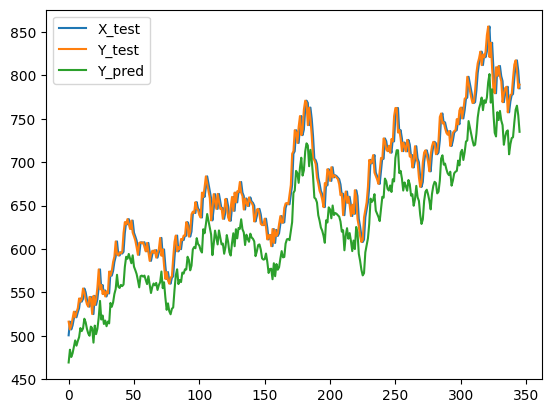

In [40]:
res.plot()

In [41]:
data = yf.Ticker('ZW=F')
hist = data.history(period="max",start="2022-01-01", end="2022-12-15")


In [42]:
def load_data(data,T):
    
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test
X_train,X_test,Y_train,Y_test = load_data(hist['Open'],346)

In [43]:
model = Sequential()
model.add(SimpleRNN(128, input_shape = (1,1), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)
callbacks_list = [early]
model.compile(loss = 'mape', optimizer = 'adam', metrics = ['mse'])

In [44]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
27/27 [==============================] - 1s 6ms/step - loss: 78.5546 - mse: 635673.3125 - val_loss: 61.1147 - val_mse: 251781.0000
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 45.5640 - mse: 231016.6719 - val_loss: 24.4272 - val_mse: 40541.0312
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 15.7166 - mse: 42521.4922 - val_loss: 1.7968 - val_mse: 351.0824
Epoch 4/10
27/27 [==============================] - 0s 1ms/step - loss: 14.8730 - mse: 35366.1016 - val_loss: 1.9161 - val_mse: 415.7058
Epoch 5/10
27/27 [==============================] - 0s 1ms/step - loss: 15.7936 - mse: 38685.0117 - val_loss: 1.8407 - val_mse: 382.2823
Epoch 6/10
27/27 [==============================] - 0s 1ms/step - loss: 14.5173 - mse: 34355.4805 - val_loss: 6.7020 - val_mse: 3383.6858
Epoch 7/10
27/27 [==============================] - 0s 1ms/step - loss: 16.4690 - mse: 44451.8516 - val_loss: 2.7937 - val_mse: 810.2117
Epoch 8/10
27/27 [=============

In [45]:
Y_pred = model.predict(X_test).reshape(X_test.shape[0])
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

4/4 [==============================] - 0s 719us/step


,X_test,Y_test,Y_pred
0,798.00,787.25,740.026428
1,787.25,808.50,730.063660
2,808.50,810.25,749.757385
3,810.25,819.50,751.379211
4,819.50,803.25,759.951721
...,...,...,...
101,727.25,721.00,674.457764
102,721.00,712.75,668.665466
103,712.75,733.00,661.019592
104,733.00,741.00,679.786560


<AxesSubplot: >

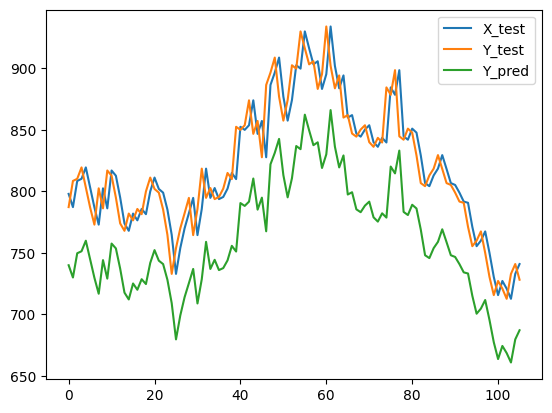

In [46]:
res.plot()

5-fold

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
scores = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model.fit(X_train, y_train)
    score = model.evaluate(X_val, y_val, verbose=0)
    scores.append(score)

mean = np.mean(scores)
std = np.std(scores)
confidence_interval = t.interval(0.95, len(scores)-1, mean, std)
print(confidence_interval)
print(mean)

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).
3. Split your dataset into train and test.
3. Construct an an appropriate neural network model on the train set.
4. Test your model on the test set. Did your model work? Explain.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv')
df

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


In [3]:
df[df['Timely response?'].isnull()]

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?


In [4]:
df[df['Issue'].isnull()]

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
11730,11730,1235087,Bank account or service,Other bank product/service,NaN,NaN,FL,33428.0,2015-02-09,2015-02-10,Wells Fargo,Closed with explanation,Yes,NaN
13198,13198,1226302,Bank account or service,Checking account,NaN,NaN,FL,33487.0,2015-02-05,2015-02-05,JPMorgan Chase,Closed with monetary relief,Yes,NaN


In [5]:
df.drop(11730, inplace=True)
df.drop(13198, inplace=True)

Columns requested from us


In [6]:
df_issue = df['Issue']
df_timelyResponse = df['Timely response?']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_issue)
X = vectorizer.transform(df_issue)

In [9]:
from sklearn import preprocessing

In [10]:
lb = LabelBinarizer()
y = lb.fit_transform(df_timelyResponse)
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

In [12]:
X_train.shape

(21115, 187)

In [13]:
y_train.shape

(21115, 1)

In [20]:
model = Sequential()
model.add(Dense(1028, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              metrics = ['binary_accuracy'],
              optimizer = 'adam')

In [21]:
model.fit(X_train, y_train,
          batch_size = 20,
          epochs = 20,
          validation_data = (X_test, y_test))

Epoch 1/20
1056/1056 [==============================] - 6s 5ms/step - loss: 0.1140 - binary_accuracy: 0.9740 - val_loss: 0.1152 - val_binary_accuracy: 0.9739
Epoch 2/20
1056/1056 [==============================] - 5s 5ms/step - loss: 0.1059 - binary_accuracy: 0.9750 - val_loss: 0.1201 - val_binary_accuracy: 0.9739
Epoch 3/20
1056/1056 [==============================] - 5s 5ms/step - loss: 0.1041 - binary_accuracy: 0.9750 - val_loss: 0.1131 - val_binary_accuracy: 0.9739
Epoch 4/20
1056/1056 [==============================] - 5s 5ms/step - loss: 0.1043 - binary_accuracy: 0.9750 - val_loss: 0.1100 - val_binary_accuracy: 0.9739
Epoch 5/20
1056/1056 [==============================] - 5s 5ms/step - loss: 0.1034 - binary_accuracy: 0.9750 - val_loss: 0.1342 - val_binary_accuracy: 0.9739
Epoch 6/20
1056/1056 [==============================] - 5s 5ms/step - loss: 0.1026 - binary_accuracy: 0.9750 - val_loss: 0.1114 - val_binary_accuracy: 0.9739
Epoch 7/20
1056/1056 [==============================

Although the success of the model is very high, it always remains constant.
